In [75]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import seaborn as sns
sns.set()

In [76]:
raw = pd.read_csv('./reddit_questions.tsv', sep='\t')
raw.head(1)

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov
0,1441289,BendyZebra,W,1441289,"Its horrible being severe, isnt it?",False,2.091765e-07,False


In [77]:
def pronouns(x):
    keywords = [' he ', ' him ', ' she ', 'her', ' they ', ' them ', ' it ', 'is that', ' this ']
    return any(i in x.lower() for i in keywords)

def has_or(x):
    return 'or' in x.lower()

def rhetoric(x):
    keywords = ['shouldn\'t', 'wouldn\'t', 'couldn\'t']
    return any(x.lower().startswith(i) for i in keywords)

def too_short(x):
    return len(x.split(' ')) <= 5

def filter_q(x):    
    return not(pronouns(x) or too_short(x) or rhetoric(x))

raw['valid_q'] = raw.q.apply(filter_q)
# qy questions
df = raw[raw.valid_q & raw.is_qy].copy()
# all question
#df = raw[raw.valid_q].copy()

In [78]:
df

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov,valid_q
36,1188038,slangwitch,W,1188038,Are those reasons deep and trust based or superficial and changeable?,True,0.000606,False,True
49,1203482,sabrunka,W,1203482,Is the blood from the pads/liners/tampons visible?,True,0.001047,False,True
123,1209361,hopewings,W,1209361,Do you know what I was thinking about each pregnancy?,True,0.004429,False,True
143,467944,Anglaceandwhiskey,W,467944,Doesnt that make you feel sexy?,True,0.005406,False,True
160,1195449,kornberg,W,1195449,Are you going to let those kids die because youre afraid of rocking the boat?,True,0.006012,False,True
...,...,...,...,...,...,...,...,...,...
339716,578834,zerostyle,M,578834,Do you really need to overclock?,True,0.999999,False,True
339799,1349462,lost_send_berries,M,1349462,"Do you want David Cameron, a statesman who has stood up for Britain around the world, who will h...",True,1.000000,False,True
339804,578014,Mr_Dr_Prof_Derp,M,578014,Is my build ready to go?,True,1.000000,False,True
339816,1023439,GhostfaceNoah,M,1023439,Do you know how many Steelers fans born outside Pennsylvania are also Pirates fans?,True,1.000000,False,True


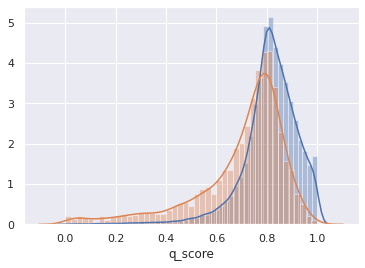

In [79]:
sns.distplot(df[df.op_gender == 'M'].q_score)
sns.distplot(df[df.op_gender == 'W'].q_score)

In [81]:
df.sort_values('q_score', inplace=True)
female = df[df.op_gender == 'W'].head(500)
male = df[df.op_gender == 'M'].tail(500)
male.head(10)
#female.tail(50)

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov,valid_q
329387,1156421,kanst,M,1156421,Do you want congress to actually be run by lobbyists?,True,0.979769,False,True
329402,1136257,Loggie,M,1136257,Are you seriously trying to quote mine?,True,0.979803,False,True
329416,116932,mcjunker,M,116932,Does Karma still have that feel good vibe when you reverse the logic behind it?,True,0.979833,False,True
329427,791856,thepulloutmethod,M,791856,Do you have the game fully updated?,True,0.979850,False,True
329431,1391651,iNEEDheplreddit,M,1391651,Is basketball played professionally(fulltime paid players) in these countries?,True,0.979853,False,True
329445,191838,Pander,M,191838,Did you pay for your internet so you can post this?,True,0.979874,False,True
329458,570797,jaxspider,M,570797,Do you know what subreddit youre on?,True,0.979889,False,True
329461,820565,ezinc,M,820565,Do we know for sure the current ranks are distributed evenly on a bell curve?,True,0.979901,False,True
329469,151315,graffiti81,M,151315,Do I have to take for granted that middle class white people are bigots?,True,0.979918,False,True
329476,1141439,Uphoria,M,1141439,"Do you think the 90 million gun owners, owning over 300 million guns are going to roll over and ...",True,0.979940,False,True


In [82]:
df_ = pd.concat([female, male])
df_['gpt'] = df_.q.apply(lambda x: x + '<|endoftext|>')
df_[['op_gender', 'gpt']].to_csv('qy_1000_MW.tsv', sep='\t', header=None, index=False)

In [83]:
!shuf ./qy_1000_MW.tsv | head

M	Is your check engine light on?<|endoftext|>
M	Is my Tony Parker selection really that bad compared to what the advanced analytic crowd bears out?<|endoftext|>
M	Are the Knicks going to be a good team next year?<|endoftext|>
W	Do you wear makeup with your heels?<|endoftext|>
W	Do you take many breaks, to add some rhythm to your day?<|endoftext|>
M	Is End of Nations not a sequel?<|endoftext|>
M	Do you need a DVD drive?<|endoftext|>
M	Arent these the same folks who banned guns?<|endoftext|>
M	Do you know a guide or article on how emulators such as RPCS3 work?<|endoftext|>
M	Did you not read what I said?<|endoftext|>
shuf: write error: Broken pipe
